In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.integrate import ode
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
from mpl_toolkits import axes_grid1

In [3]:
a= 5
b= 500
xx = np.linspace(-a, a, b)
yy = np.linspace(-a, a, b)
mX, mY = np.meshgrid(xx,yy)

In [4]:
r00=np.array([0,0]) 
                    

def stokeslet_Tylor(r00,mX,mY):

    Id=np.zeros([b,b])
    for i in range(0,b):
        Id[i,i]=1
        
    r=np.array([mX-r00[0],mY-r00[1]])
    
    Idr = np.dot(r, Id)
    x2r = r*(r[1,:]**2)
    modr=(r[0]**2+r[1]**2)**.5
    
    u,v =   3*x2r/modr**5  - Idr/modr**3
    
    return [u,v]

u0,v0 = stokeslet_Tylor(r00,mX,mY)

u0 = u0*(-1)
v0 = v0*(-1)


In [5]:
# set the starting point of the magnetic field line
xstart = np.linspace(-0.99*a, 0.99*a, 10)
ystart =np.zeros(10)


ystart[:10]= 0.99*a



ystart = np.append(ystart, 0.04)
xstart = np.append(xstart, .15)
ystart = np.append(ystart, 0.02)
xstart = np.append(xstart, .15)
ystart = np.append(ystart, 0.0015)
xstart = np.append(xstart, .15)
ystart = np.append(ystart, -0.04)
xstart = np.append(xstart, -.15)
ystart = np.append(ystart, -0.02)
xstart = np.append(xstart, -.15)
ystart = np.append(ystart, -0.0015)
xstart = np.append(xstart, -.15)

    
places=np.vstack([xstart,ystart]).T
# interpolate function of the Bx and Bz as functions of (x,z) position
fbx = interpolate.interp2d(xx,yy,u0)
fbz = interpolate.interp2d(xx,yy,v0)

def B_dir(t,p,fx,fz):
    ex = fx(p[0],p[1])
    ez = fz(p[0],p[1])
    n = (ex**2+ez**2)**0.5
    return [ex/n, ez/n]



In [6]:
R=0.001
dt=0.8*R

# plot area
x0, x1= -0.99*a, 0.99*a
y0, y1= -0.99*a, 0.99*a

#set the ode function
r=ode(B_dir)
r.set_integrator('vode'
                 #, nsteps=1e8
                )
r.set_f_params(fbx,fbz)



xs,ys = [],[]
for p in places:
    x=[p[0]] 
    y=[p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(r.y[1])
        hit_electrode=False
        #check if field line left drwaing area
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    xs.append(x)
    ys.append(y)
    
nxs,nys = [],[]
for p in places:
    x=[p[0]] 
    y=[-p[1]]
    r.set_initial_value([p[0], p[1]], 0)
    while r.successful():
        r.integrate(r.t+dt)
        x.append(r.y[0])
        y.append(-r.y[1])
        hit_electrode=False
        #check if field line left drwaing area
        if (not (x0<r.y[0] and r.y[0]<x1)) or (not (y0<r.y[1] and r.y[1]<y1)):
            break
    nxs.append(x)
    nys.append(y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


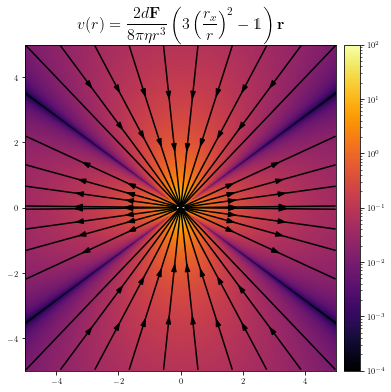

In [11]:
fig=plt.figure(figsize=(6,6),facecolor="w")

plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{dsfont}'
})

ax = plt.axes()

p, result = [], []
for x in xs:
    p.append(len(x))

    
[result.append(x) for x in p if x not in result]

result.sort()
l, m, k = result[0], result[1], result[-1]
h = int(m/3)
p =int(k/100)


for x,y in zip(xs,ys):
    ax.plot(x,y, color="k" , zorder=10)
    if len(x) != result[-1]:
        ax.arrow(x[h], y[h], x[h-1]-x[h-2], y[h+5]-y[h+4], 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[2*h], y[2*h], x[2*h-1]-x[2*h-2], y[2*h+5]-y[2*h+4], 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
    if len(x) == result[-1]:
        ax.arrow(x[84*p], y[84*p], (x[84*p-1]-x[84*p-2]), (y[84*p+5]-y[84*p+4]), 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[71*p], y[71*p], (x[71*p-1]-x[71*p-2]), (y[71*p+5]-y[71*p+4]), 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
for x,y in zip(nxs,nys):
    ax.plot(x,y, color="k" , zorder=10)
    if len(x) != result[-1]:
        ax.arrow(x[h], y[h], x[h-1]-x[h-2], y[h+5]-y[h+4], 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[2*h], y[2*h], x[2*h-1]-x[2*h-2], y[2*h+5]-y[2*h+4], 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
    if len(x) == result[-1]:
        ax.arrow(x[84*p], y[84*p], (x[84*p-1]-x[84*p-2]), (y[84*p+5]-y[84*p+4]), 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
        ax.arrow(x[71*p], y[71*p], (x[71*p-1]-x[71*p-2]), (y[71*p+5]-y[71*p+4]), 
        length_includes_head=True, head_width=.15, color="k", zorder=5)
    
   
Z = np.sqrt(v0**2+u0**2)


image = ax.pcolormesh(mX, mY, Z,
                norm=colors.LogNorm(vmin= 10**(-4), vmax=10**2),    
                #norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), 
                      snap=True,
               cmap=plt.cm.inferno, rasterized=True, 
               shading='gouraud', zorder=0)


def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

ax.set_title(r'$\displaystyle\\v(r)='
            r'\frac{2d \mathbf{F}}{8 \pi  \eta r^3 } \left( 3 \left( \frac{r_x}{r}\right)^2 - \mathds{1}\right) \mathbf{r}$', fontsize=16, color='k')
add_colorbar(image)


# dpi=4000 to make everything 'in shape'... but it lasts ages'''
#plt.savefig('tylor_series_title.pdf', bbox_inches='tight', pad_inches=0, dpi=400)
#overwrite?
